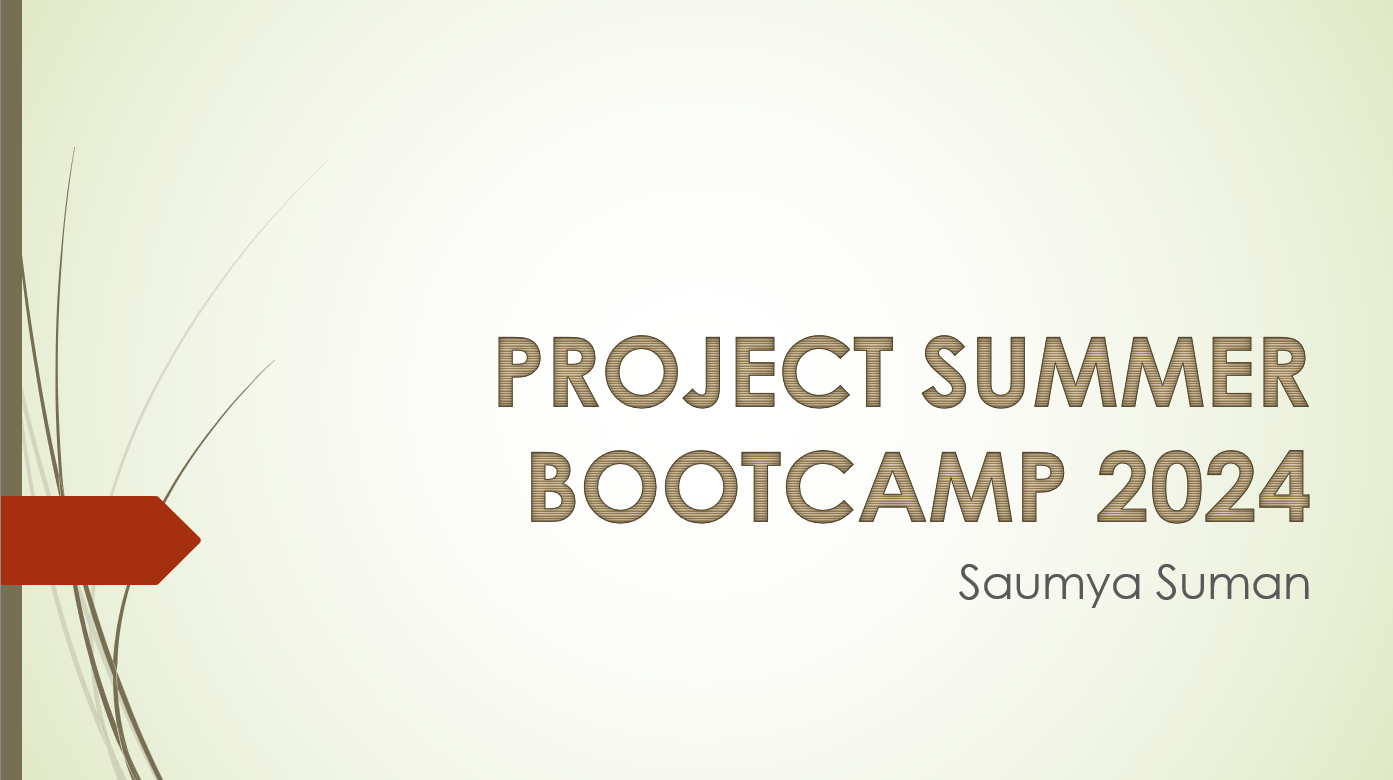

# Objective

The data contains the details for the Uber rides across various boroughs (subdivisions) of New York City at an hourly level and attributes associated with weather conditions at that time.

Data Description

* pickup_dt: Date and time of the pick-up.
* borough: NYC's borough.
* pickups: Number of pickups for the period (hourly).
* spd: Wind speed in miles/hour.
* vsb: Visibility in miles to the nearest tenth.
* temp: Temperature in Fahrenheit.
* dewp: Dew point in Fahrenheit.
* slp: Sea level pressure.
* pcp01: 1-hour liquid precipitation.
* pcp06: 6-hour liquid precipitation.
* pcp24: 24-hour liquid precipitation.
* sd: Snow depth in inches.
* hday: Being a holiday (Y) or not (N).


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("3-Uber_Data_New.csv")

### 1.Display the top five rows

In [7]:
df.head().T

,0,1,2,3,4
pickup_dt,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00,1/1/2015 1:00
borough,Bronx,Brooklyn,EWR,Manhattan,Queens
pickups,152.0,1519.0,0.0,5258.0,405.0
spd,5.0,5.0,5.0,5.0,5.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,30.0,NaN,30.0,30.0,30.0
dewp,7.0,7.0,7.0,7.0,7.0
slp,1023.5,1023.5,1023.5,1023.5,1023.5
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### 2.Display the last 5 rows

In [6]:
df.tail().T

,29096,29097,29098,29099,29100
pickup_dt,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00,30-06-2015 23:00
borough,EWR,Manhattan,Queens,Staten Island,NaN
pickups,0.0,3828.0,580.0,0.0,3.0
spd,7.0,7.0,7.0,7.0,7.0
vsb,10.0,10.0,10.0,10.0,10.0
temp,75.0,75.0,75.0,75.0,75.0
dewp,65.0,65.0,65.0,65.0,65.0
slp,1011.8,1011.8,1011.8,1011.8,1011.8
pcp01,0.0,0.0,0.0,0.0,0.0
pcp06,0.0,0.0,0.0,0.0,0.0


### 3.Check the shape of dataset.

In [8]:
df.shape

(29101, 13)

### 4.Check the datatypes of each feature.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


#### Observations:
* Datatype of pickups is float but should be integer, needs to be checked

### 5.Check the Statistical summary

In [15]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


### 6.Check the null values 

In [10]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

### 7.Check the duplicate values

In [16]:
df.duplicated().sum()

0

#### Observations:
There is no duplicate values

### 8.Check the anomalies or wrong entries

In [50]:
df[df.isin(['?']).any(axis=1)]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,Hours


### 9.Check the outliers and their authenticity

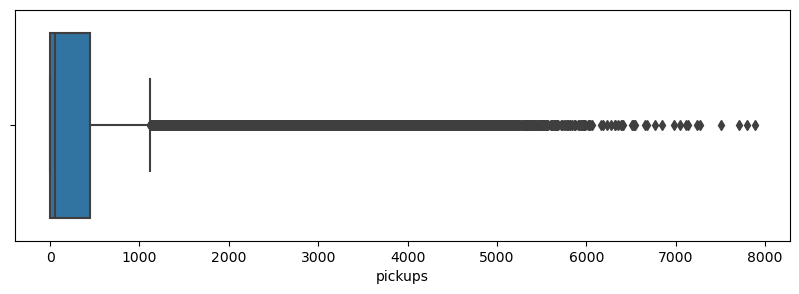

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='pickups');

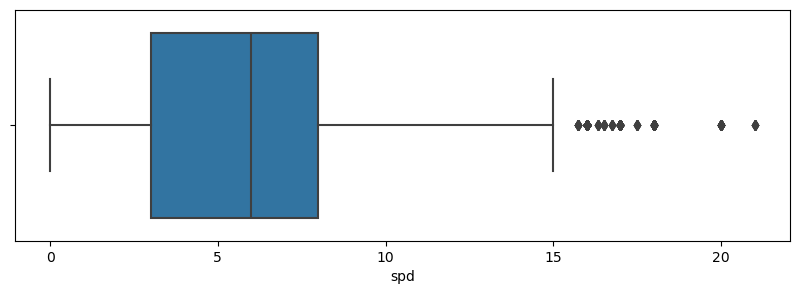

In [22]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='spd');

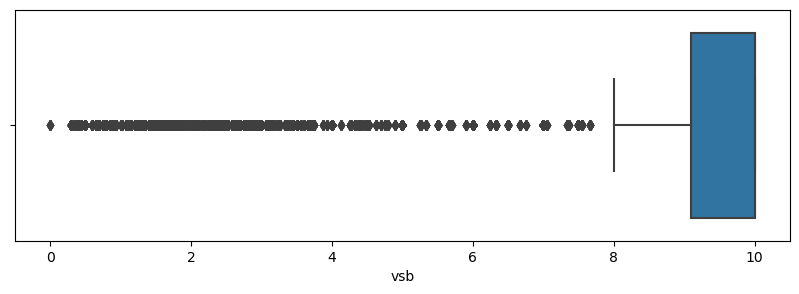

In [23]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='vsb');

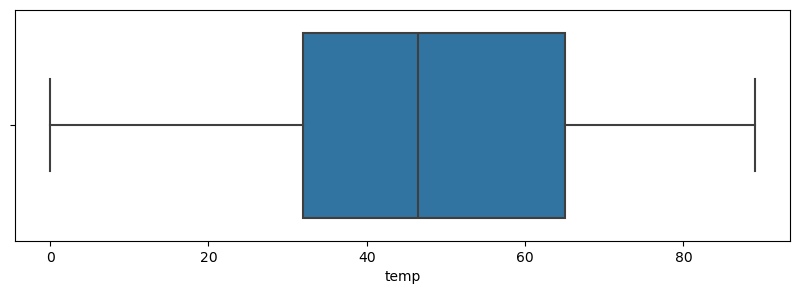

In [24]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='temp');

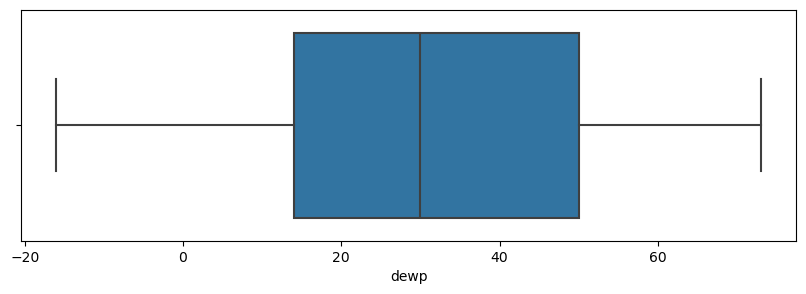

In [25]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='dewp');

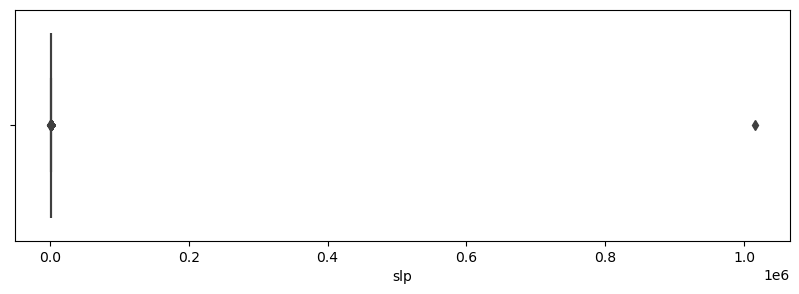

In [26]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='slp');

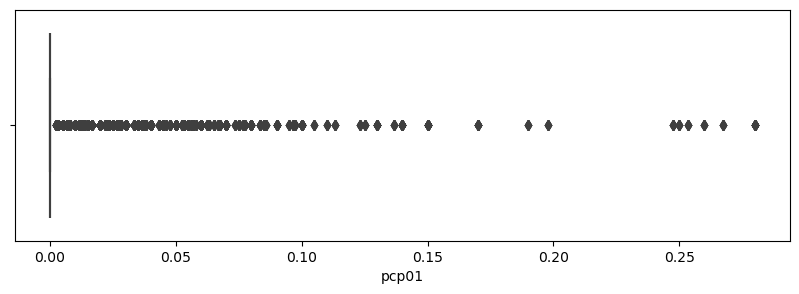

In [27]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='pcp01');

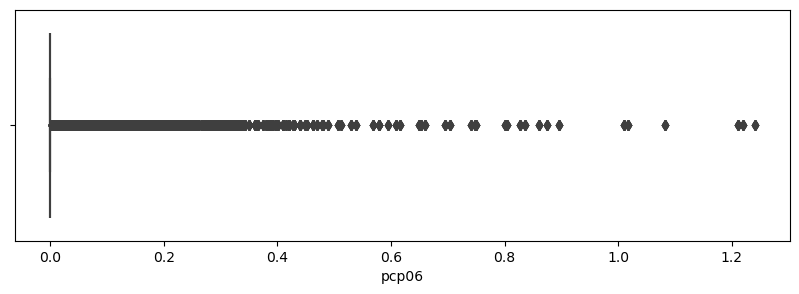

In [28]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='pcp06');

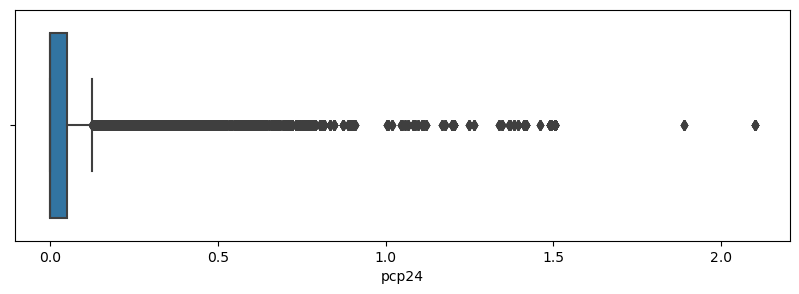

In [29]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='pcp24');

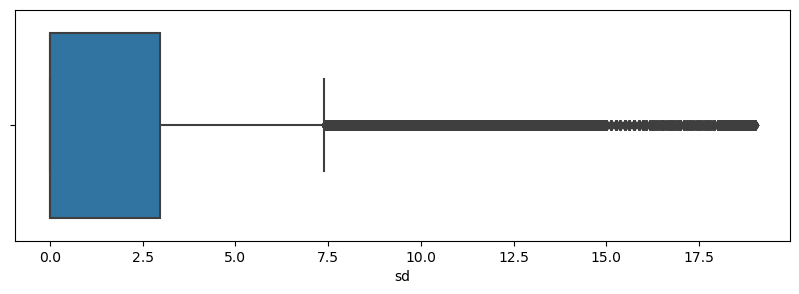

In [30]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='sd');

### 10.Cleaning Data

In [4]:
df["hday"]=df["hday"].replace('?',np.nan)

In [53]:
mode1 = df["hday"].mode()
df["hday"]=df["hday"].replace(np.nan, mode1[0])

In [47]:
mean1 = df["temp"].mean()
df["temp"]=df["temp"].replace(np.nan, mean1)

In [51]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,Hours
count,29099.000000,29101.000000,29101.000000,29101.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169,11.597574
std,995.680628,3.699007,2.442897,19.678024,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325,6.907042
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000,6.000000
50%,54.000000,6.000000,10.000000,47.000000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000,12.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333,18.000000
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000,23.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
 13  Hours      29101 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 3.1+ MB


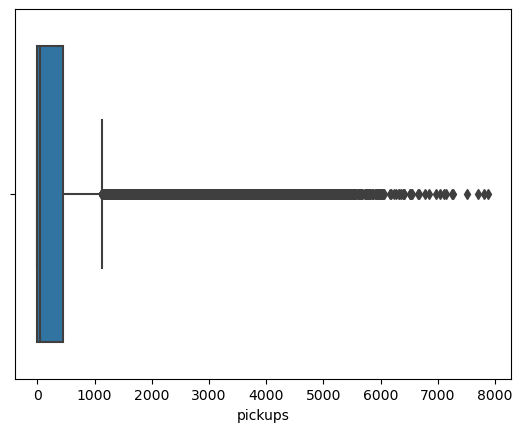

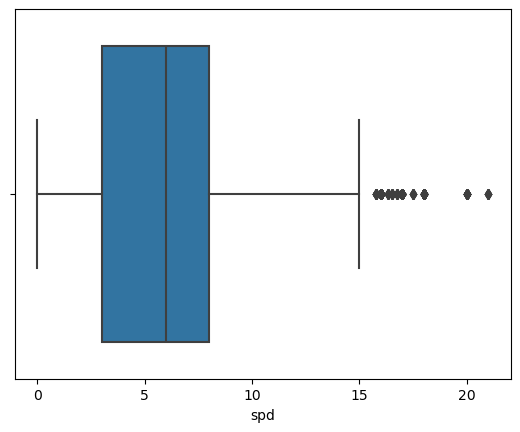

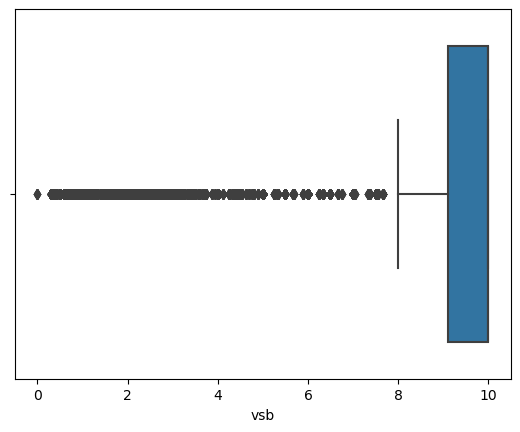

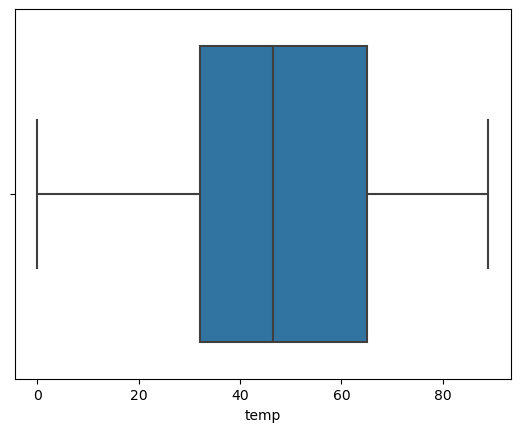

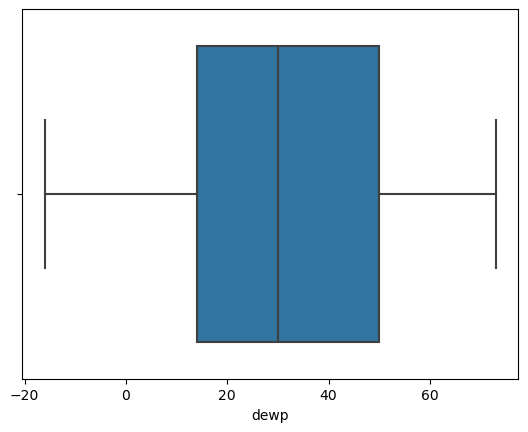

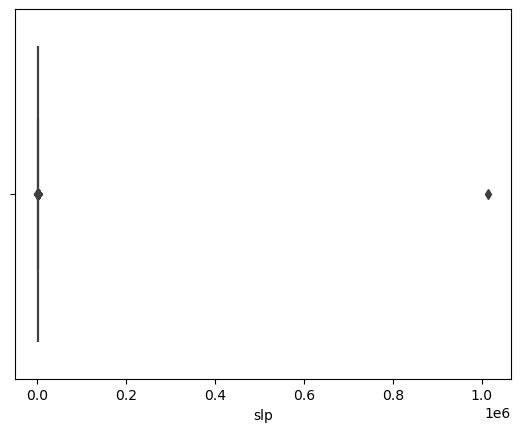

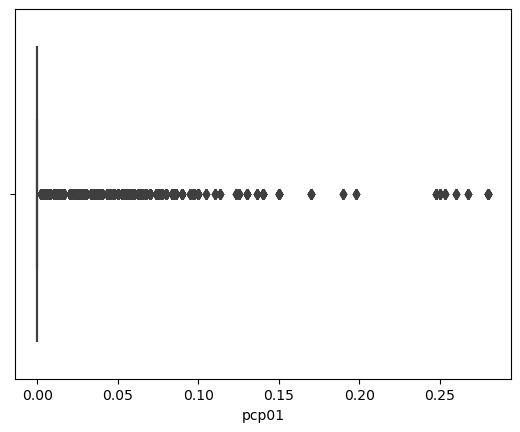

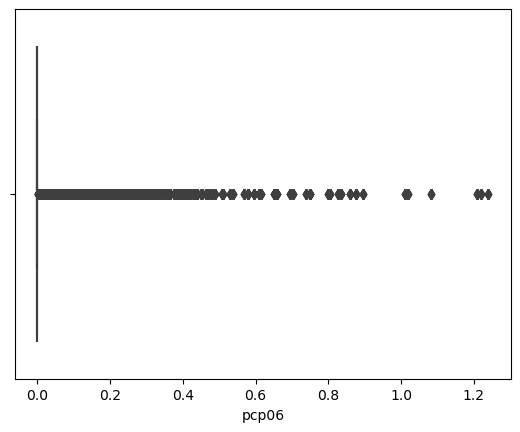

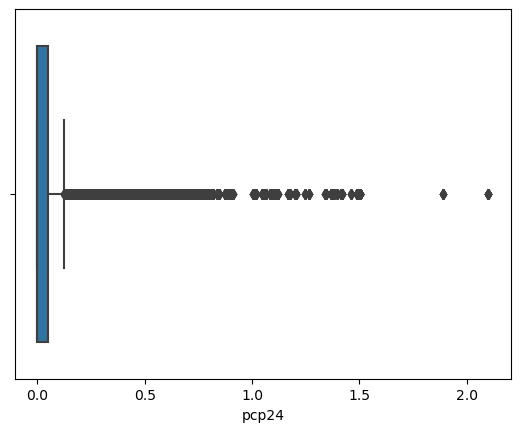

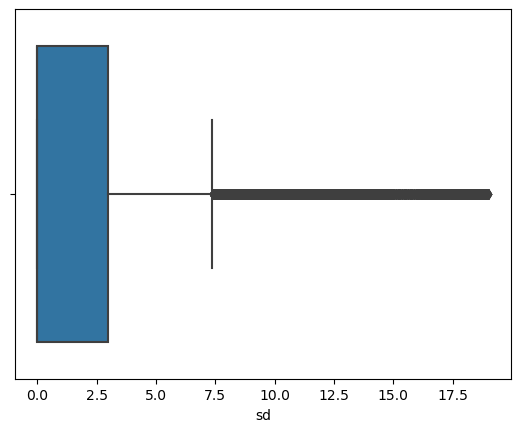

In [29]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(data=df,x=i)
        plt.show()

### 1.Pickup Analysis
* What is the total number of Uber pickups across all boroughs?
* Which borough has the highest average number of hourly pickups?
* How do the number of pickups vary across different hours of the day?
* Which day of the week has the highest number of pickups?

In [75]:
# Ans 1
df1 = df.groupby('borough')['pickups'].sum().reset_index()
df1

,borough,pickups
0,Bronx,219919.0
1,Brooklyn,2321035.0
2,EWR,105.0
3,Manhattan,10367841.0
4,Queens,1343261.0
5,Staten Island,6957.0


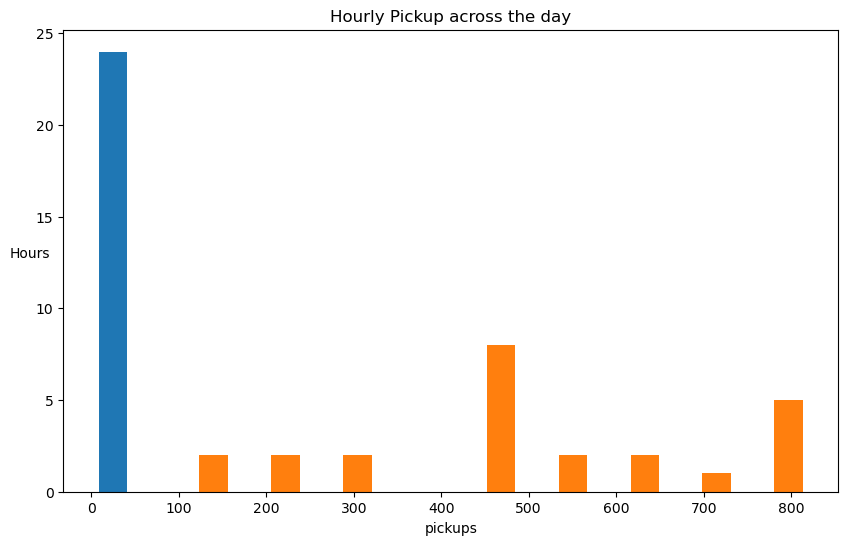

In [111]:
# Ans 3
df2 = df.groupby('Hours')['pickups'].mean().reset_index()

plt.figure(figsize = (10, 6))
plt.hist(df2)
plt.title('Hourly Pickup across the day')
plt.xlabel('pickups')
plt.ylabel('Hours', rotation = 360)
plt.show()

In [87]:
df3 = df['pickups']
df3.max()

7883.0

In [88]:
# Ans 2
df[df['pickups'] == df3.max()]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,Hours
28604,27-06-2015 22:00,Manhattan,7883.0,8.0,5.5,60.0,56.5,1016.9,0.065,0.0,0.0,0.0,N,22


#### Observations:
* The total number of Uber pickups across all boroughs is shown in form of dataframe
* Manhattan has the highest average number of hourly pickup
* The pickup across various hours of day is as shown in graph

### 2.Weather Impact
* What is the correlation between temperature and the number of pickups?
* How does visibility impact the number of pickups?
* Is there a relationship between wind speed and the number of pickups?
* How does precipitation (1-hour, 6-hour, 24-hour) affect the number of pickups?

In [57]:
df['temp'].corr(df['pickups'])

0.0541430398063203

In [34]:
df['vsb'].corr(df['pickups'])

-0.007474433707060389

df['spd'].corr(df['pickups'])

df_hour = []
for i in df['Hours']:
    if i in [1, 6, 24]:
        df_hour.append(i)
df_hour

df4 = df[df['Hours'] in df_hour]
df4

In [116]:
#df.groupby('Hours')['pickups'].sum().reset_index()

#### Observations:
* The correlation between temperature and the number of pickups is 0.054164576372027026
* The average number of pickups for different visibility levels is -0.007474433707060389
* Yes, there a relationship between wind speed and the number of pickups and the relation is 0.011110156997631692

### Obseravtion
* There is no correlation between Temperature and Number of pickups
* Visibility does not impact the number of pickups
* There is no relationship between wind speed and number of pickups
* 

### 3.Seasonal Trends
* How do the number of pickups vary across different seasons (winter, spring, summer, fall)?
* What is the average number of pickups during holidays compared to non-holidays?
* How does snow depth influence the number of pickups?

In [125]:
# Ans 3
df['sd'].corr(df['pickups'])

-0.008252751568238643

#### Observations
*
*
* There is no correlation between snow depth and number of pickups

### 4.Hourly Trends
* What are the peak hours for Uber pickups in each borough?
* How do the number of pickups change during rush hours (e.g., 7-9 AM, 5-7 PM)?
* What is the average number of pickups during late-night hours (e.g., 12 AM - 4 AM)?

In [9]:
z=[]
for j in [i[1].split(':') for i in df['pickup_dt'].str.split(' ')]:
    z. append(int(j[0]))
df['Hours']=z

### 5.Borough Comparison
* What are the peak hours for Uber pickups in each borough?
* How do the number of pickups change during rush hours (e.g., 7-9 AM, 5-7 PM)?
* What is the average number of pickups during late-night hours (e.g., 12 AM - 4 AM)?

### 6.Weather Extremes
* How do extreme weather conditions (e.g., very high or very low temperatures, heavy rainfall, snowstorms) affect the number of pickups?
* What is the impact of visibility less than 1 mile on the number of pickups??


### 7.Data Correlations
* Is there a correlation between sea level pressure and the number of pickups?
* How do different weather variables (temperature, dew point, wind speed, visibility) collectively impact the number of pickups?
* What is the relationship between holiday status and weather conditions on the number of pickups?

In [5]:
df['slp'].corr(df['pickups'])

-0.0019970228781402235

### 8.Growth Insights
* Which weather conditions are most favorable for Uber pickups, and how can this information be used to optimize driver availability?
* Based on the data, what recommendations can be made to Uber to increase pickups during low-demand periods?